In [1]:
!gdown --id 1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g -O CIFAR10.tar.gz 
!tar xzf CIFAR10.tar.gz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g
To: /content/CIFAR10.tar.gz
100% 19.8M/19.8M [00:00<00:00, 107MB/s] 


In [2]:
from tensorflow import keras
from keras import datasets, layers, losses
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [4]:
model = keras.Sequential([
                          
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(10, kernel_initializer='he_uniform', activation='softmax')

])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [6]:
model.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, batch_size=50, epochs=25, validation_data=(test_images, test_labels))

Epoch 1/25
1000/1000 [==============================] - 375s 375ms/step - loss: 2.3031 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/25
1000/1000 [==============================] - 375s 375ms/step - loss: 2.3033 - accuracy: 0.0947 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/25
1000/1000 [==============================] - 377s 377ms/step - loss: 2.3029 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/25
1000/1000 [==============================] - 377s 377ms/step - loss: 2.3028 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/25
1000/1000 [==============================] - 378s 378ms/step - loss: 2.3038 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/25
1000/1000 [==============================] - 377s 377ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/25
1000/1000 [==============================] - 377s 377ms/step - loss: 2.3028 - accuracy: 0.0999 - val_

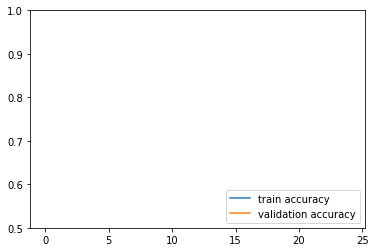

In [15]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')